# Layer Normalization - Image Data

## Giới thiệu

Layer Normalization là một kỹ thuật normalization được áp dụng trên feature dimension. Đối với dữ liệu ảnh, thường có shape (batch, channels, height, width).

Layer Normalization sẽ normalize theo:
- Mean và variance được tính trên channel, height, và width dimensions
- Normalize cho từng sample độc lập (không phụ thuộc vào batch)

## Công thức

```
mean = mean(x, dim=(1, 2, 3))  # Tính mean theo channel, height, width
var = var(x, dim=(1, 2, 3))    # Tính variance theo channel, height, width
x_norm = (x - mean) / sqrt(var + eps)
output = gamma * x_norm + beta
```

Trong đó:
- gamma: learnable scale parameter (một cho mỗi channel)
- beta: learnable shift parameter (một cho mỗi channel)
- eps: small constant để tránh chia cho 0

Khác với BatchNorm: LayerNorm tính statistics cho từng sample riêng biệt, không phụ thuộc vào batch size.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LayerNorm2D:
    """
    Layer Normalization cho 2D image data (4D tensor: batch, channels, height, width)
    """
    def __init__(self, num_channels, eps=1e-5):
        self.num_channels = num_channels
        self.eps = eps
        
        # Learnable parameters
        self.gamma = np.ones(num_channels)  # Scale
        self.beta = np.zeros(num_channels)  # Shift
        
    def forward(self, x):
        """
        x shape: (batch, channels, height, width)
        """
        # Tính mean và var theo channel, height, width dimensions
        # Normalize cho từng sample độc lập
        mean = np.mean(x, axis=(1, 2, 3), keepdims=True)
        var = np.var(x, axis=(1, 2, 3), keepdims=True)
        
        # Normalize
        x_norm = (x - mean) / np.sqrt(var + self.eps)
        
        # Scale and shift
        gamma = self.gamma.reshape(1, -1, 1, 1)
        beta = self.beta.reshape(1, -1, 1, 1)
        output = gamma * x_norm + beta
        
        return output

print("LayerNorm2D class đã được định nghĩa!")


LayerNorm2D class đã được định nghĩa!


## Ví dụ 1: 1 Sample, 1 Kernel (Channel)

Shape: (1, 1, 4, 4) - 1 batch, 1 channel, 4x4 image


Input shape: (1, 1, 4, 4)
Input data:
[[  9.96714153   3.61735699  11.47688538  20.23029856]
 [  2.65846625   2.65863043  20.79212816  12.67434729]
 [  0.30525614  10.42560044   0.36582307   0.34270246]
 [  7.41962272 -14.13280245 -12.24917833  -0.62287529]]

Input mean: 4.7456
Input std: 9.4022

Output shape: (1, 1, 4, 4)
Output data:
[[ 0.55535368 -0.11999629  0.71592692  1.64692188]
 [-0.22198193 -0.22196447  1.70667691  0.8432865 ]
 [-0.4722645   0.60411443 -0.46582272 -0.46828178]
 [ 0.28440484 -2.0078666  -1.80752823 -0.57097864]]

Output mean: 0.0000
Output std: 1.0000


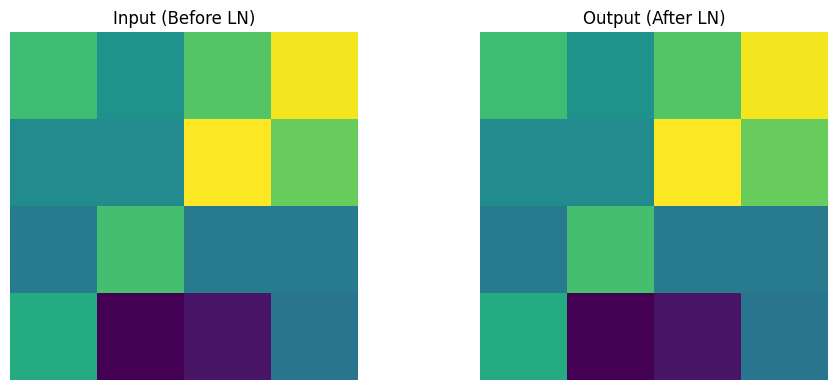

In [2]:
# Ví dụ 1: 1 Sample, 1 Kernel
np.random.seed(42)
x1 = np.random.randn(1, 1, 4, 4) * 10 + 5  # 1 batch, 1 channel, 4x4
print(f"Input shape: {x1.shape}")
print(f"Input data:\n{x1[0, 0]}")
print(f"\nInput mean: {np.mean(x1):.4f}")
print(f"Input std: {np.std(x1):.4f}")

# Khởi tạo LayerNorm
ln1 = LayerNorm2D(num_channels=1)

# Forward pass
output1 = ln1.forward(x1)
print(f"\nOutput shape: {output1.shape}")
print(f"Output data:\n{output1[0, 0]}")
print(f"\nOutput mean: {np.mean(output1):.4f}")
print(f"Output std: {np.std(output1):.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(x1[0, 0], cmap='viridis')
axes[0].set_title('Input (Before LN)')
axes[0].axis('off')

axes[1].imshow(output1[0, 0], cmap='viridis')
axes[1].set_title('Output (After LN)')
axes[1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 2: 1 Sample, 2 Kernels (Channels)

Shape: (1, 2, 4, 4) - 1 batch, 2 channels, 4x4 image


Input shape: (1, 2, 4, 4)

Channel 0 mean: 4.7456, std: 9.4022
Channel 1 mean: 2.5083, std: 9.0820
Overall sample mean: 3.6269, std: 9.3109

Output shape: (1, 2, 4, 4)

Channel 0 - Output mean: 0.1201, std: 1.0098
Channel 1 - Output mean: -0.1201, std: 0.9754
Overall sample output mean: -0.0000, std: 1.0000


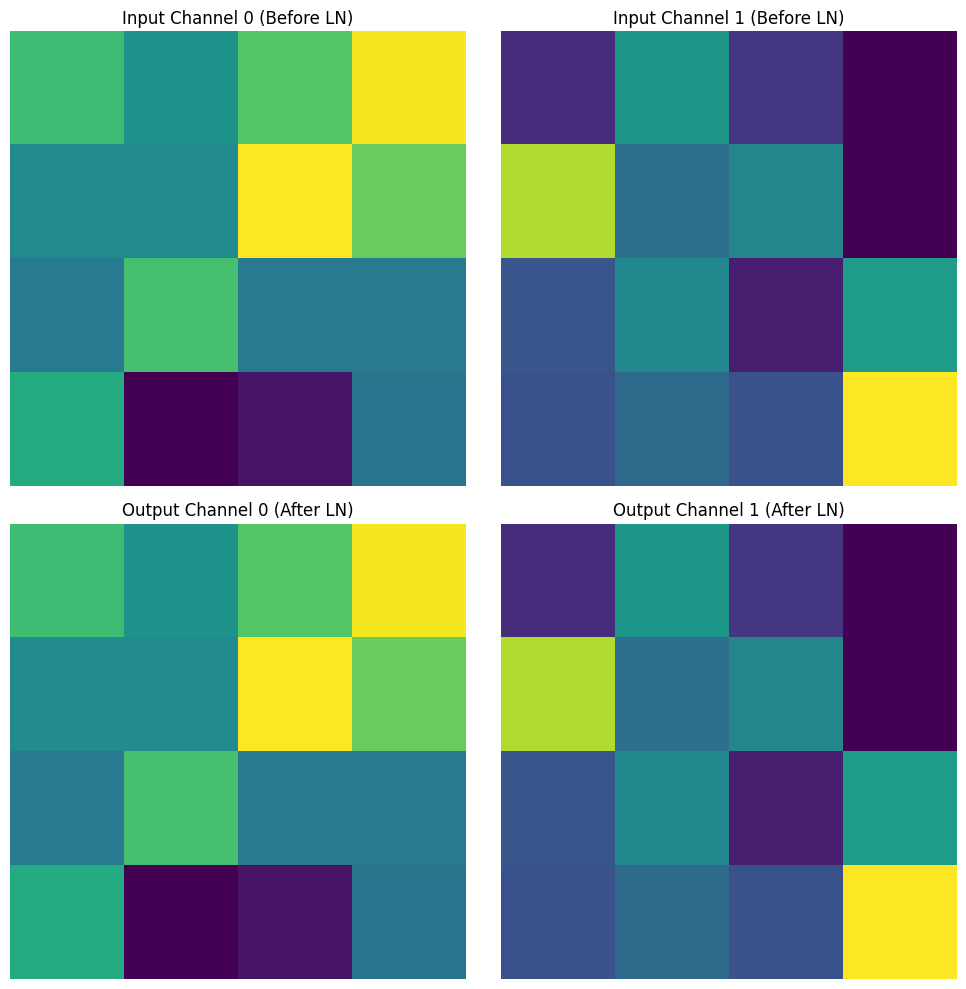

In [3]:
# Ví dụ 2: 1 Sample, 2 Kernels
np.random.seed(42)
x2 = np.random.randn(1, 2, 4, 4) * 10 + 5  # 1 batch, 2 channels, 4x4
print(f"Input shape: {x2.shape}")
print(f"\nChannel 0 mean: {np.mean(x2[0, 0]):.4f}, std: {np.std(x2[0, 0]):.4f}")
print(f"Channel 1 mean: {np.mean(x2[0, 1]):.4f}, std: {np.std(x2[0, 1]):.4f}")
print(f"Overall sample mean: {np.mean(x2[0]):.4f}, std: {np.std(x2[0]):.4f}")

# Khởi tạo LayerNorm với 2 channels
ln2 = LayerNorm2D(num_channels=2)

# Forward pass
output2 = ln2.forward(x2)
print(f"\nOutput shape: {output2.shape}")
print(f"\nChannel 0 - Output mean: {np.mean(output2[0, 0]):.4f}, std: {np.std(output2[0, 0]):.4f}")
print(f"Channel 1 - Output mean: {np.mean(output2[0, 1]):.4f}, std: {np.std(output2[0, 1]):.4f}")
print(f"Overall sample output mean: {np.mean(output2[0]):.4f}, std: {np.std(output2[0]):.4f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(x2[0, 0], cmap='viridis')
axes[0, 0].set_title('Input Channel 0 (Before LN)')
axes[0, 0].axis('off')

axes[0, 1].imshow(x2[0, 1], cmap='viridis')
axes[0, 1].set_title('Input Channel 1 (Before LN)')
axes[0, 1].axis('off')

axes[1, 0].imshow(output2[0, 0], cmap='viridis')
axes[1, 0].set_title('Output Channel 0 (After LN)')
axes[1, 0].axis('off')

axes[1, 1].imshow(output2[0, 1], cmap='viridis')
axes[1, 1].set_title('Output Channel 1 (After LN)')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 3: 2 Samples, 1 Kernel (Channel)

Shape: (2, 1, 4, 4) - 2 batches, 1 channel, 4x4 image

Trong trường hợp này, LayerNorm sẽ normalize từng sample độc lập, không phụ thuộc vào batch.


Input shape: (2, 1, 4, 4)

Sample 0 mean: 4.7456, std: 9.4022
Sample 1 mean: 2.5083, std: 9.0820

Output shape: (2, 1, 4, 4)

Sample 0 - Output mean: 0.0000, std: 1.0000
Sample 1 - Output mean: 0.0000, std: 1.0000


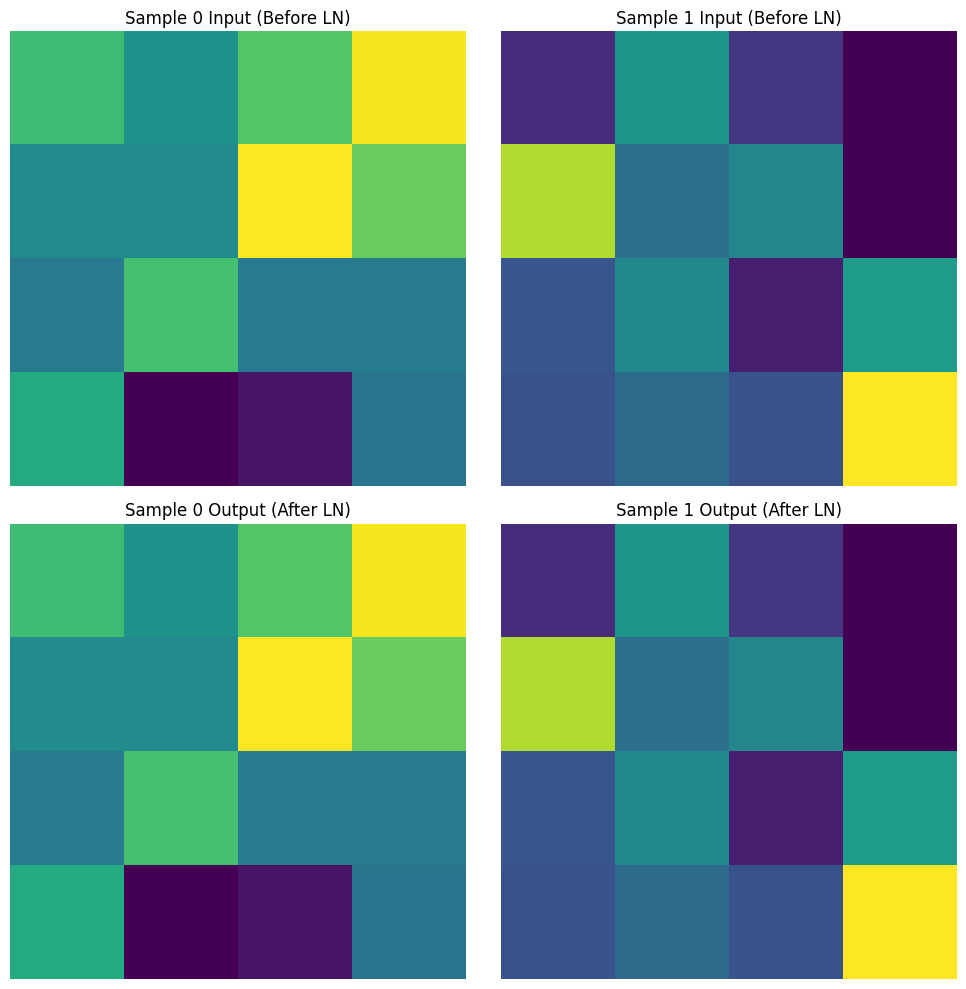

In [4]:
# Ví dụ 3: 2 Samples, 1 Kernel
np.random.seed(42)
x3 = np.random.randn(2, 1, 4, 4) * 10 + 5  # 2 batches, 1 channel, 4x4
print(f"Input shape: {x3.shape}")
print(f"\nSample 0 mean: {np.mean(x3[0]):.4f}, std: {np.std(x3[0]):.4f}")
print(f"Sample 1 mean: {np.mean(x3[1]):.4f}, std: {np.std(x3[1]):.4f}")

# Khởi tạo LayerNorm
ln3 = LayerNorm2D(num_channels=1)

# Forward pass
output3 = ln3.forward(x3)
print(f"\nOutput shape: {output3.shape}")
print(f"\nSample 0 - Output mean: {np.mean(output3[0]):.4f}, std: {np.std(output3[0]):.4f}")
print(f"Sample 1 - Output mean: {np.mean(output3[1]):.4f}, std: {np.std(output3[1]):.4f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(x3[0, 0], cmap='viridis')
axes[0, 0].set_title('Sample 0 Input (Before LN)')
axes[0, 0].axis('off')

axes[0, 1].imshow(x3[1, 0], cmap='viridis')
axes[0, 1].set_title('Sample 1 Input (Before LN)')
axes[0, 1].axis('off')

axes[1, 0].imshow(output3[0, 0], cmap='viridis')
axes[1, 0].set_title('Sample 0 Output (After LN)')
axes[1, 0].axis('off')

axes[1, 1].imshow(output3[1, 0], cmap='viridis')
axes[1, 1].set_title('Sample 1 Output (After LN)')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 4: 2 Samples, 2 Kernels (Channels)

Shape: (2, 2, 4, 4) - 2 batches, 2 channels, 4x4 image

Đây là trường hợp đầy đủ nhất. Mỗi sample được normalize độc lập.


Input shape: (2, 2, 4, 4)
Sample 0, Channel 0 - mean: 4.7456, std: 9.4022
Sample 0, Channel 1 - mean: 2.5083, std: 9.0820
Sample 0 overall - mean: 3.6269, std: 9.3109
Sample 1, Channel 0 - mean: 1.5872, std: 8.5957
Sample 1, Channel 1 - mean: 3.5048, std: 8.1643
Sample 1 overall - mean: 2.5460, std: 8.4374

Output shape: (2, 2, 4, 4)
Sample 0, Channel 0 - Output mean: 0.1201, std: 1.0098
Sample 0, Channel 1 - Output mean: -0.1201, std: 0.9754
Sample 0 overall - Output mean: -0.0000, std: 1.0000
Sample 1, Channel 0 - Output mean: -0.1136, std: 1.0188
Sample 1, Channel 1 - Output mean: 0.1136, std: 0.9676
Sample 1 overall - Output mean: -0.0000, std: 1.0000


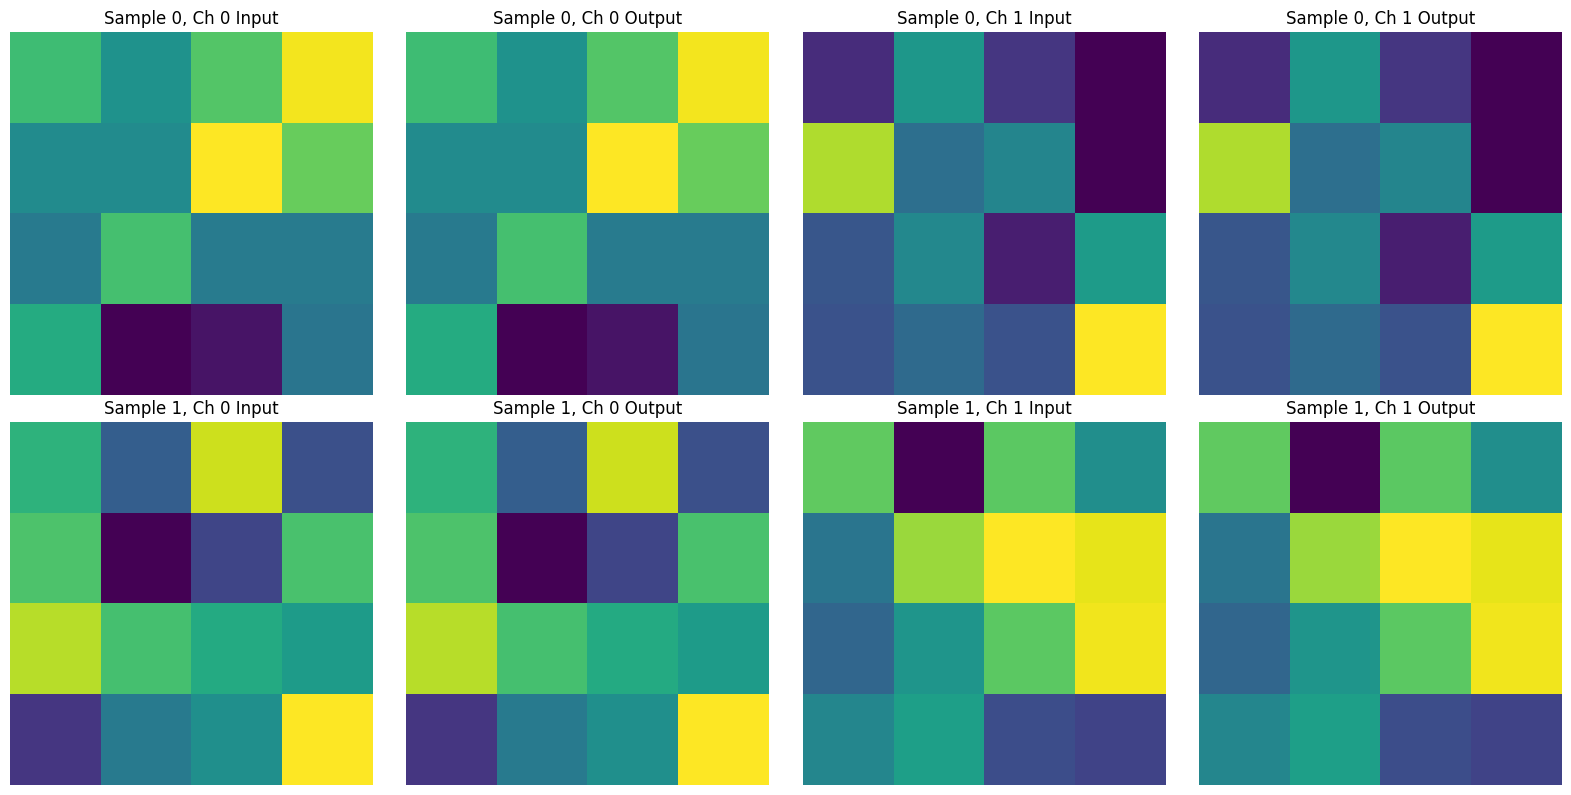

In [5]:
# Ví dụ 4: 2 Samples, 2 Kernels
np.random.seed(42)
x4 = np.random.randn(2, 2, 4, 4) * 10 + 5  # 2 batches, 2 channels, 4x4
print(f"Input shape: {x4.shape}")

for b in range(2):
    for c in range(2):
        print(f"Sample {b}, Channel {c} - mean: {np.mean(x4[b, c]):.4f}, std: {np.std(x4[b, c]):.4f}")
    print(f"Sample {b} overall - mean: {np.mean(x4[b]):.4f}, std: {np.std(x4[b]):.4f}")

# Khởi tạo LayerNorm với 2 channels
ln4 = LayerNorm2D(num_channels=2)

# Forward pass
output4 = ln4.forward(x4)
print(f"\nOutput shape: {output4.shape}")

for b in range(2):
    for c in range(2):
        print(f"Sample {b}, Channel {c} - Output mean: {np.mean(output4[b, c]):.4f}, std: {np.std(output4[b, c]):.4f}")
    print(f"Sample {b} overall - Output mean: {np.mean(output4[b]):.4f}, std: {np.std(output4[b]):.4f}")

# Visualize
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for b in range(2):
    for c in range(2):
        axes[b, c*2].imshow(x4[b, c], cmap='viridis')
        axes[b, c*2].set_title(f'Sample {b}, Ch {c} Input')
        axes[b, c*2].axis('off')
        
        axes[b, c*2+1].imshow(output4[b, c], cmap='viridis')
        axes[b, c*2+1].set_title(f'Sample {b}, Ch {c} Output')
        axes[b, c*2+1].axis('off')

plt.tight_layout()
plt.show()
